In [7]:
import numpy as np
import GPy
import jedi

#configure plotting
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib;matplotlib.rcParams['figure.figsize'] = (8,5)
from matplotlib import pyplot as plt
GPy.plotting.change_plotting_library('matplotlib')
from IPython.display import display

## Two - Dimensional | Regression

In [3]:
# sample inputs and outputs
X = np.random.uniform(-3.,3.,(50,2))
Y = np.sin(X[:,0:1]) * np.sin(X[:,1:2])

In [9]:
GPy.kern?

 C:\Users\mikep\anaconda3\lib\site-packages\GPy\plotting\matplot_dep\plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'covariance': [<matplotlib.contour.QuadContourSet at 0x13d255bda30>]}

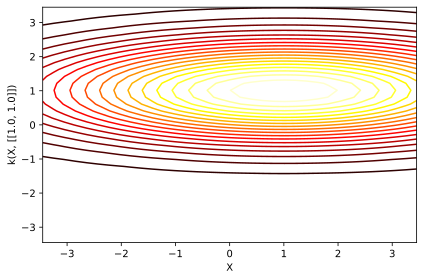

In [4]:
# define kernel
# ker = GPy.kern.Matern52(2, ARD=True) + GPy.kern.White(2)

k1 = GPy.kern.RBF(1, 1, 1, active_dims=[0]) # works on the first column of X, index=0
k2 = GPy.kern.RBF(1, 3, 3, active_dims=[1]) # works on the second column of X, index=1

k = k1 * k2
k.plot()

In [10]:
# create simple GP model
m = GPy.models.GPRegression(X, Y, k)

display(m)

GP_regression.,value,constraints,priors
mul.rbf.variance,1.0,+ve,
mul.rbf.lengthscale,1.0,+ve,
mul.rbf_1.variance,3.0,+ve,
mul.rbf_1.lengthscale,3.0,+ve,
Gaussian_noise.variance,1.0,+ve,


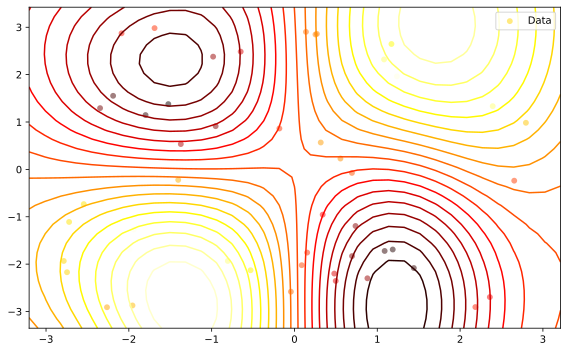

In [11]:
fig = m.plot()

In [12]:
# optimize
m.optimize(messages=True, max_f_eval = 1000)
display(m)

GP_regression.,value,constraints,priors
mul.rbf.variance,1.4913778249004699,+ve,
mul.rbf.lengthscale,2.3008384176053043,+ve,
mul.rbf_1.variance,3.0604656834809827,+ve,
mul.rbf_1.lengthscale,2.3683515062334197,+ve,
Gaussian_noise.variance,5.75630959057174e-15,+ve,


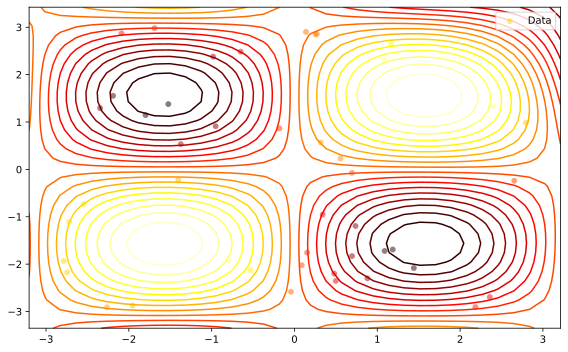

In [13]:
fig = m.plot()

The flag `ARD=True` in the definition of the `Matern` kernel specifies that we want one lengthscale parameter per dimension (ie the GP is not isotropic). Note that for 2-d plotting, only the mean is shown.

## Plotting slices
To see the uncertaintly associated with the above predictions, we can plot slices through the surface. this is done by passing the optional `fixed_inputs` argument to the plot function. `fixed_inputs` is a list of tuples containing which of the inputs to fix, and to which value.

To get horixontal slices of the above GP, we'll fix second (index 1) input to -1, 0, and 1.5:

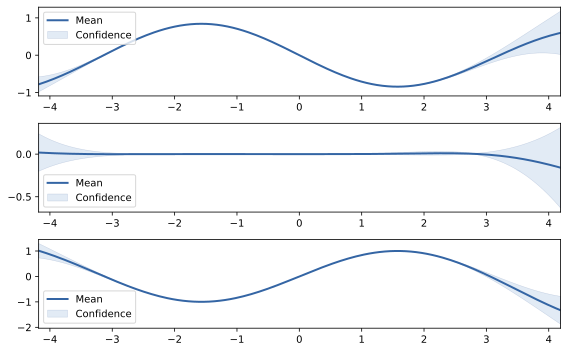

In [14]:
slices = [-1, 0, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1)
                        #shared_xaxes=True,
                        #subplot_titles=('slice at -1', 
                                        #'slice at 0', 
                                        #'slice at 1.5', 
                                        #)
                                    #)
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(1,y)], row=(i+1), plot_data=False)
#GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing')

The data look strange here: we're seeing slices of the GP, but all the data are displayed, even though they might not be close to the current slice.

To get vertical slices, we simply fixed the other input. We'll turn the display of data off also:

In [ ]:
slices = [-1, 0, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1) 
                        #subplot_titles=('slice at -1', 
                                        #'slice at 0', 
                                        #'slice at 1.5', 
                                        #)
                            #)
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(0,y)], row=(i+1), plot_data=False)
#GPy.plotting.show(canvas, filename='basic_gp_regression_notebook_slicing_vertical')

You can find a host of other plotting options in the `m.plot` docstring. `Type m.plot?<enter>` to see. 

In [ ]:
m.plot?